<a href="https://colab.research.google.com/github/deltorobarba/sciences/blob/master/chemistry_oxygen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Oxygen (O₂)**

**Sauerstoff (O₂)** und **Ozon (O₃) als Biosignature 🌱**
- O₂ entsteht auf der Erde vor allem durch **Photosynthese**.
- O₃ ist ein photochemisches Nebenprodukt von O₂ – weist indirekt auf O₂ hin

[(Triplet) oxygen](https://en.m.wikipedia.org/wiki/Triplet_oxygen)

![oxygen](https://upload.wikimedia.org/wikipedia/commons/e/e9/Triplet_dioxygen.png)

 * **Crucial Diagnostic of Dense Molecular Clouds and Star Formation**: Molecular oxygen (O₂) is a fundamental constituent of dense molecular clouds, the birthplaces of stars. While its symmetric nature makes it challenging to detect, its rotational transitions serve as direct probes of the physical conditions within these environments. Spectral analysis of O₂ provides critical information on the gas density, temperature, and kinematics, allowing astronomers to characterize the thermal and chemical evolution of star-forming regions and the processes leading to gravitational collapse.
 * **Key Indicator of Molecular Gas Content and Depletion**: As one of the most abundant molecules in the universe (after H₂), O₂ is expected to be a significant component of molecular gas. However, its observed abundance in many interstellar environments is often much lower than expected due to efficient chemical depletion onto dust grains and conversion into other species like H₂O. Spectral studies of O₂ offer unique insights into the overall molecular gas reservoir, the efficiency of depletion mechanisms, and the chemical pathways that govern the composition of interstellar clouds.
 * **Probe of Oxygen Budget and Water Formation Pathways**: Oxygen is the third most abundant element in the universe, and its molecular form (O₂) plays a central role in interstellar chemistry, particularly in the formation of water. Observing and analyzing O₂ spectra helps constrain the total oxygen budget in various astrophysical environments and provides vital information about the chemical reactions that lead to the formation of interstellar water, a molecule crucial for astrobiology and planetary habitability.
 * **Challenging but Rewarding Observational Target at Far-Infrared and Submillimeter Wavelengths**: Due to its lack of a permanent dipole moment, the pure rotational transitions of O₂ are weak. However, its magnetic dipole transitions lie in the far-infrared and submillimeter wavelength ranges. Space-based observatories like the Herschel Space Observatory and future missions operating at these wavelengths are essential for detecting and studying O₂, pushing the boundaries of our understanding of molecular gas in the universe where ground-based observations are severely limited by atmospheric absorption.
 * **Insights into Shock Chemistry and Outflows**: In regions experiencing shocks, such as those driven by outflows from young stellar objects or supernova remnants, molecular oxygen can be released from ice mantles on dust grains or formed through gas-phase reactions. Spectral signatures of O₂ in these dynamic environments can provide valuable clues about the energetic processes occurring, tracing the impact of stellar feedback on the surrounding molecular gas and offering insights into the chemical evolution of shocked interstellar medium.

In [ ]:
!pip install pyscf geometric -q
import numpy as np
import matplotlib.pyplot as plt
from pyscf import gto, scf, hessian, dft, tddft, mp, cc
from pyscf.geomopt.geometric_solver import optimize

In [ ]:
# Define molecule
mol = gto.Mole()
mol.atom = '''
    O  0.00 0.00  0.00
    O  0.00 0.00  1.21
'''

# Name
molecule = 'Oxygen (O₂)'

In [ ]:
# Build molecule (with gto.M() function)
mol.atom = mol.atom
mol.basis = 'cc-pvdz' # Alternative basis set: sto-3g, cc-pvdz,6-31G
mol.symmetry = True
mol.spin = 2          # O2 is a triplet ground state, we set spin=2 high-spin state explicitly for an unrestricted calculation
mol.build()

*mol.spin only deviates from 0 when dealing with molecules that have unpaired electrons in their ground state (like free radicals or molecules with triplet or higher multiplicity ground states) or if deliberately trying to model an excited state with a different spin multiplicity. For the vast majority of stable, neutral organic and inorganic molecules encountered in introductory chemistry, the ground electronic state will be a singlet, meaning mol.spin = 0. The most prominent exception among common small molecules is molecular oxygen (O₂), which has a triplet ground state (mol.spin = 2).*

In [ ]:
print("-" * 20)
print(f"{molecule} molecule symmetry:")
print(f" Top group: {mol.topgroup}")
print(f" Group name: {mol.groupname}")
print("-" * 20)

--------------------
Oxygen (O₂) molecule symmetry:
 Top group: Dooh
 Group name: Dooh
--------------------


Point Group Symmetry

* **Shape:** Linear (Diatomic molecule)
* **Symmetry Operations:** Infinite rotation axis ($C_\infty$) along the bond, infinite number of vertical mirror planes ($\sigma_v$), a horizontal mirror plane ($\sigma_h$), and an inversion center ($i$).
* **Point Group:** **$D_{\infty h}$ (Dooh)**


Like H₂ and CO₂, O₂ is a homonuclear diatomic molecule. This linear arrangement with an inversion center at the midpoint of the bond means it possesses the highest possible symmetry for a linear molecule, which is $D_{\infty h}$.

For diatomic molecules like H2 and O2, the highest possible point group symmetry is Dooh (D-infinity-h). PySCF will automatically detect this if symmetry=True is set.

In [ ]:
# Ground State Energy with Hartree-Fock (Slater Determinant)
mf = scf.RHF(mol)
mf.kernel()

converged SCF energy = -149.607587679465


np.float64(-149.60758767946453)

converged SCF energy = -149.607587679464


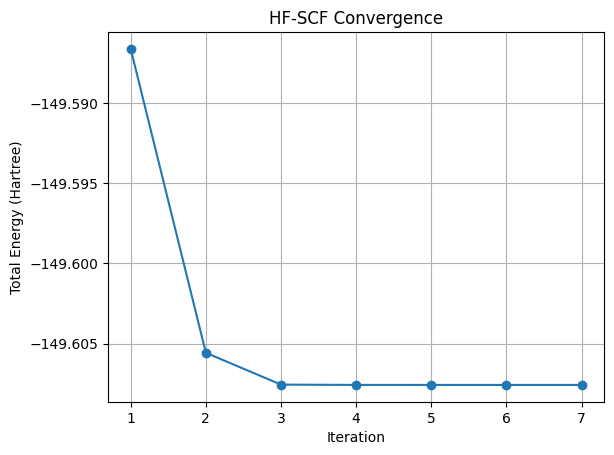

Ground state energy for Oxygen (O₂): -149.60758767946444 Hartree


In [ ]:
# Visualization of calculation process (Hartree-Fock)
mf = scf.RHF(mol)                         # Set method
conv_data = []                            # Store convergence data
def callback(envs):                       # Callback function to collect convergence information
    conv_data.append(envs['e_tot'])       # Captures energy values at each iteration to track process
mf.callback = callback                    # Set callback directly on the mf object
energy = mf.kernel()                      # Perform HF calculation
energies = conv_data                      # Extract energy values
iterations = range(1, len(energies) + 1)  # Extract iteration numbers
plt.plot(iterations, energies, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Total Energy (Hartree)')
plt.title('HF-SCF Convergence')
plt.grid(True)
plt.show()
print(f"Ground state energy for {molecule}: {energy} Hartree")

In [ ]:
# Ground State Energy with DFT (Kohn-Sham)
mf = dft.RKS(mol)
mf.xc = 'B3LYP'    # Exchange-correlation functional
mf.kernel()

converged SCF energy = -150.330233348606


np.float64(-150.3302333486062)

In [ ]:
# Ground State Energy with Møller-Plesset Perturbation Theory (Post Hartree Fock)
mf = scf.RHF(mol)
mf.kernel()
mp2 = mp.MP2(mf) # MP2 single point energy calculation
energy_mp2 = mp2.kernel()
print(f"MP2 energy: {energy_mp2[0]} Hartree")

converged SCF energy = -149.607587679465

WARN: RMP2 method does not support ROHF method. ROHF object is converted to UHF object and UMP2 method is called.

E(UMP2) = -149.983373543203  E_corr = -0.375785863738612
E(SCS-UMP2) = -149.956125094134  E_corr = -0.348537414669677
MP2 energy: -0.37578586373861206 Hartree


In [ ]:
# Ground State Energy with Coupled Cluster (Post Hartree Fock)
mf = scf.RHF(mol)                  # Perform a HF-SCF calculation to obtain the reference wavefunction
hf_energy = mf.kernel()
ccsd_calc = cc.CCSD(mf)            # Perform a Coupled Cluster calculation
ccsd_energy = ccsd_calc.kernel()
ccsd_t_energy = ccsd_calc.ccsd_t() # (Optional) Include perturbative triple excitations (CCSD(T))

# Ensure that ccsd_t_energy is a scalar (take the first element if it's an array)
if isinstance(ccsd_t_energy, (list, tuple)) or hasattr(ccsd_t_energy, "__len__"):
    ccsd_t_energy = ccsd_t_energy[0]  # Take the first value if it returns multiple results

# Print the results
#print(f"HF-SCF energy: {hf_energy} Hartree")
#print(f"CCSD energy: {ccsd_energy} Hartree")
#print(f"CCSD(T) energy: {ccsd_energy + ccsd_t_energy} Hartree")

converged SCF energy = -149.607587679464

WARN: RCCSD method does not support ROHF method. ROHF object is converted to UHF object and UCCSD method is called.

E(UCCSD) = -149.9783875563904  E_corr = -0.3707998769260248
UCCSD(T) correction = -0.0109920054930769


In [ ]:
# Excited electronic states
myhf = scf.RHF(mol).run()     # Perform a ground-state calculation
mytd = tddft.TDA(myhf).run()  # Excited-state calculation using TDDFT
#mol = gto.M(verbose = 4)     # Add verbose for more details
mytd.analyze()

converged SCF energy = -149.607587679465
Excited State energies (eV)
[3.90464772 3.90464772 4.12870064]

** Excitation energies and oscillator strengths **
Excited State   1: E2ux      3.90465 eV    317.53 nm  f=0.0000
Excited State   2: E2uy      3.90465 eV    317.53 nm  f=0.0000
Excited State   3:  ???      4.12870 eV    300.30 nm  f=0.0000


In [ ]:
# Geometry Optimization (in Angstroms) with HF or DFT
# Take molecule including basis set defined from `mol.build()`
mf = dft.RKS(mol)     # Perform geometry optimization using DFT (Restricted Kohn-Sham)
mf.xc = 'b3lyp'       # Define the exchange-correlation functional
mol_eq = optimize(mf)
print(mol_eq.atom_coords())

converged SCF energy = -149.607587679464


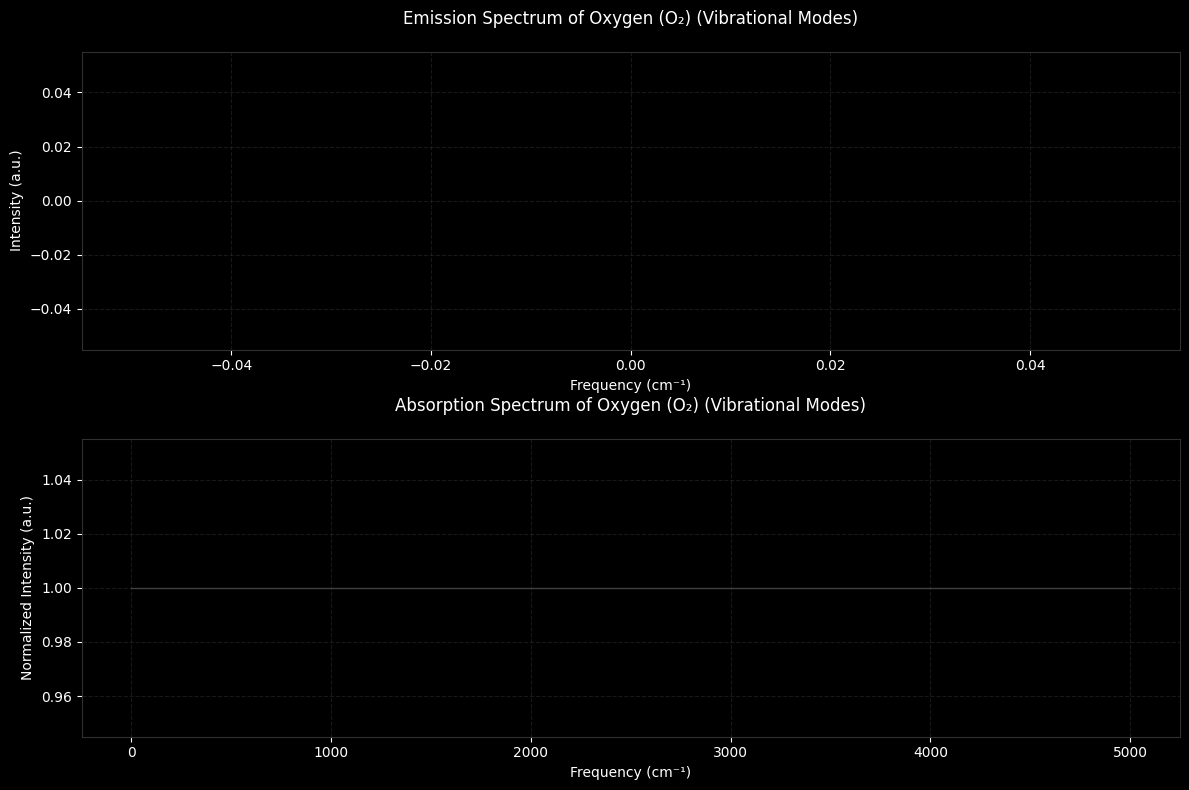

In [ ]:
# Emission and Absorption Spectra (Electronic Frequencies / Transitions)

mf = scf.RHF(mol)                                     # Perform a ground-state calculation for molecular vibrational frequencies
mf.kernel()
hess = hessian.RHF(mf).kernel()                       # Calculate the Hessian matrix (force constants)
frequencies = np.linalg.eigvalsh(hess)                # Diagonalize the Hessian to get vibrational frequencies
frequencies = np.sqrt(np.abs(frequencies)) * 5140.48  # Conversion factor to cm^-1 (more accurate)
frequencies = frequencies[(frequencies > 0) & (frequencies < 5000)]  # Filter out non-physical (imaginary) frequencies and limit to realistic range

# Plot stlyes
EMISSION_COLOR = '#ff9500'  # Bright orange
ABSORPTION_COLOR = '#00b4d8'  # Bright blue
BASELINE_COLOR = '#404040'  # Dark gray
GRID_COLOR = '#303030'  # Slightly lighter gray for grid
plt.figure(figsize=(12, 8), facecolor='black') # Create figure with dark background
plt.style.use('dark_background') # Set the style to dark background

# Emission Spectrum
plt.subplot(2, 1, 1)
plt.bar(frequencies, height=1.0, width=15.0, color=EMISSION_COLOR, alpha=0.8)
plt.xlabel('Frequency (cm⁻¹)', color='white', fontsize=10)
plt.ylabel('Intensity (a.u.)', color='white', fontsize=10)
plt.title(f'Emission Spectrum of {molecule} (Vibrational Modes)',
         color='white', pad=20, fontsize=12)

# Customize grid and spines
plt.grid(True, color=GRID_COLOR, linestyle='--', alpha=0.5)
for spine in plt.gca().spines.values():
    spine.set_color(GRID_COLOR)
plt.tick_params(colors='white')

# Absorption Spectrum
plt.subplot(2, 1, 2)
# Create baseline
plt.plot(np.linspace(0, 5000, 1000), np.ones(1000),
         color=BASELINE_COLOR, linewidth=1)

# Plot absorption lines with gradient effect
for freq in frequencies:
    y = np.linspace(0, 1, 100)
    x = np.ones_like(y) * freq
    plt.plot(x, y, color=ABSORPTION_COLOR,
            alpha=0.8, linewidth=2)

plt.xlabel('Frequency (cm⁻¹)', color='white', fontsize=10)
plt.ylabel('Normalized Intensity (a.u.)', color='white', fontsize=10)
plt.title(f'Absorption Spectrum of {molecule} (Vibrational Modes)',
         color='white', pad=20, fontsize=12)

# Customize grid and spines
plt.grid(True, color=GRID_COLOR, linestyle='--', alpha=0.5)
for spine in plt.gca().spines.values():
    spine.set_color(GRID_COLOR)
plt.tick_params(colors='white')

# Adjust layout and display
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

# Set figure background to black
plt.gcf().patch.set_facecolor('black')

plt.show()